In [2]:
%load_ext autoreload
%autoreload 2

In [16]:
import json
import datadict
import functions
import devices
import plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.preprocessing import MinMaxScaler

## Load Data

In [4]:
data = datadict.DataFile("data_new_PV.json")

## Module

In [29]:
# set module type
all_layers = {}

og_keys = ['Organic PV', 'Silicon tandem', 'Monocrystalline', 'Polycrystalline', 'CdTe', 'CIGS']
camel_case = ['organicPV', 'siliconTandem', 'monocrystalline', 'polycrystalline', 'cdte', 'cigs']
rename_keys = dict(zip(og_keys,camel_case))
for module_type in data.module_types:
    # reset the module type
    data.module_type_selected = module_type
    # access the layers
    data.get_layers()
    # print out combinations of inputs
    # use the print out to set the next cell's manual dict
    layers = data.layer_location_options()
    # assign
    all_layers[rename_keys[module_type]] = layers


Back electrode:
 - Layer Options
    - Aluminum production (CA-QC)
    - Aluminum production (RoW)

Electron transport layer:
 - Layer Options
    - Lithium fluoride (RoW)
    - Lithium fluoride (CN)
    - Lithium fluoride (GLO)

Substrate:
 - Layer Options
    - PET (RER)
    - PET (RoW)
    - PET (CA-QC)

Encapsulant:
 - Layer Options
    - PET (RER)
    - PET (RoW)
    - PET (CA-QC)

FTO:
 - Layer Options
    - Indium tin oxide (RoW)
    - Indium tin oxide (RER)
    - Tin dioxide (GLO)
    - Fluorine production (RoW)

Hole transport layer:
 - Layer Options
    - Polystyrene (RER)
    - Polystyrene (RoW)
    - Polyvinylfluoride production (US)
    - Polyvinylfluoride production (RoW)
    - Molybdenum trioxide production (GLO)

P3HT:
 - Layer Options
    - Bromine (RoW)
    - Bromine (RER)
    - Bromine (GLO)
    - Electricity medium voltage (CN)
    - Electricity medium voltage (RER)
    - Electricity medium voltage (WECC-US)
    - Electricity medium voltage (Asia without China)
   

In [32]:
pprint(all_layers.keys())

dict_keys(['organicPV', 'siliconTandem', 'monocrystalline', 'polycrystalline', 'cdte', 'cigs'])


In [31]:
def write_dict_to_json_file(data, file_name):
    """
    Converts a Python dictionary to a JSON-formatted string and writes it to a file.

    :param data: Python dictionary to be converted.
    :param file_name: Name of the file to which the JSON data will be written.
    """
    # Convert the dictionary to a JSON-formatted string
    json_data = json.dumps(data, indent=4)

    # Write the JSON data to a file
    with open(file_name, 'w') as file:
        file.write(json_data)
        
write_dict_to_json_file(all_layers, "/Users/jmccarty/GitHub/parametric-bipv-app/sample_figure/layer_data.json")

In [30]:
pprint(all_layers)

{'cdte': [{'options': {'Aluminium profile': ['RER', 'RoW', 'GLO']},
           'title': 'Frame'},
          {'options': {'Glass': ['RER', 'RoW'],
                       'Polycarbonate': ['RoW', 'RER'],
                       'Tempering': ['RoW', 'RER']},
           'title': 'Front cover'},
          {'options': {'Indium tin oxide': ['RoW', 'RER']}, 'title': 'TCO'},
          {'options': {'Cadmium sulfide': ['RoW', 'US'],
                       'Cadmium telluride': ['RoW', 'US']},
           'title': 'Cell'},
          {'options': {'EVA': ['GLO', 'RER', 'RoW'],
                       'Epoxy resin': ['RER', 'RoW'],
                       'Polyurethane': ['GLO']},
           'title': 'Encapsulant'},
          {'options': {'Polyethylene terephthalate': ['RER', 'RoW', 'CA-QC'],
                       'Polyvinylfluoride film': ['RoW', 'US']},
           'title': 'Rear cover'},
          {'options': {'Glass fibre reinforced plastic': ['GLO', 'RER', 'RoW']},
           'title': 'Junction box'}

In [6]:

assmebly_input_dicts = {}
# write the input dicts
assmebly_input_dicts['Europe'] = {
    "Frame": {"option": "Aluminium profile", "location": "RER"},
    "Electricity for assembly": {
        "option": "Electricity medium voltage",
        "location": "RER",
    },
    "Front cover": {"option": "Glass", "location": "RER"},
    "Encapsulant": {"option": "EVA", "location": "RER"},
    "Rear cover": {"option": "Polyethylene terephthalate", "location": "RER"},
    "Cell": {"option": "cell", "location": "RER"},
    "Mounting system": {"option": "Aluminium processing", "location": "RER"},
    "Wires": {"option": "Copper", "location": "RER"},
    "Cell": {"option": "cell", "location": "RER"},
    "Junction box": {"option": "Glass fibre reinforced plastic", "location": "RER"},
}
# write the input dicts
assmebly_input_dicts['RestOfWorld'] = {
    "Frame": {"option": "Aluminium profile", "location": "RoW"},
    "Electricity for assembly": {
        "option": "Electricity medium voltage",
        "location": "Asia without China and GCC",
    },
    "Front cover": {"option": "Glass", "location": "RoW"},
    "Encapsulant": {"option": "EVA", "location": "RoW"},
    "Rear cover": {"option": "Polyethylene terephthalate", "location": "RoW"},
    "Cell": {"option": "cell", "location": "RoW"},
    "Mounting system": {"option": "Aluminium processing", "location": "GLO"},
    "Wires": {"option": "Copper", "location": "RoW"},
    "Cell": {"option": "cell", "location": "RoW"},
    "Junction box": {"option": "Glass fibre reinforced plastic", "location": "RER"},
}

# write the input dicts
assmebly_input_dicts['China'] = {
    "Frame": {"option": "Aluminium profile", "location": "GLO"},
    "Electricity for assembly": {
        "option": "Electricity medium voltage",
        "location": "CN",
    },
    "Front cover": {"option": "Glass", "location": "RoW"},
    "Encapsulant": {"option": "EVA", "location": "GLO"},
    "Rear cover": {"option": "Polyethylene terephthalate", "location": "RoW"},
    "Cell": {"option": "cell", "location": "RoW"},
    "Mounting system": {"option": "Aluminium processing", "location": "GLO"},
    "Wires": {"option": "Copper", "location": "RoW"},
    "Cell": {"option": "cell", "location": "RoW"},
    "Junction box": {"option": "Glass fibre reinforced plastic", "location": "GLO"},
}



In [7]:
result = data.holistic_lca(data.module_type_selected, assmebly_input_dicts['Europe'])
result = pd.DataFrame(result).transpose()
result

,Frame,Electricity for assembly,Front cover,Encapsulant,Rear cover,Cell,Mounting system,Wires,Junction box,non_numeric_unit,non_numeric_short_name,Inverter
climate change,19.39709,1.88713,10.64638,2.807,3.16139,224.98954,2.84598,0.07021,1.5932,kg CO2-Eq / sqm.,climate change,46.377132
"energy resources: non-renewable, fossil",196.8667,21.15379,112.06052,80.8112,72.94804,2605.93726,32.44762,0.77646,22.287,kg oil-Eq / sqm.,fossil,534.672029
ozone depletion,0.0,0.0,0.0,0.0,0.00002,0.00009,0.0,0.0,0.0,kg CFC-11-Eq / sqm.,ozone depletion,0.000019
acidification: terrestrial,0.07746,0.00567,0.06803,0.00664,0.00833,0.66985,0.00806,0.00189,0.00437,kg SO2-Eq / sqm.,terrestrial acidification,0.226853
photochemical oxidant formation: human health,0.04905,0.00294,0.04239,0.00518,0.00615,0.51983,0.00475,0.00036,0.00256,kg NOx-Eq / sqm.,photochemical oxidant formation: human health,0.130128
photochemical oxidant formation: terrestrial ecosystems,0.05046,0.00304,0.04341,0.00561,0.00656,0.55389,0.00492,0.00038,0.00266,kg NOx-Eq / sqm.,photochemical oxidant formation: terrestrial e...,0.1381
ecotoxicity: freshwater,8.5246,0.06924,0.23117,0.08139,0.116,12.74515,0.14516,0.16051,0.0117,"kg 1,4-DCB-Eq / sqm.",freshwater ecotoxicity,17.557054
particulate matter formation,0.04155,0.00226,0.0226,0.0026,0.00345,0.38462,0.00331,0.00061,0.00149,kg PM2.5-Eq / sqm.,particulate matter formation,0.10371
eutrophication: freshwater,0.00713,0.00149,0.00117,0.0006,0.00063,0.10232,0.00144,0.00021,0.00012,kg P-Eq / sqm.,freshwater eutrophication,0.036197
eutrophication: marine,0.00054,0.00011,0.00025,0.00009,0.0001,0.01806,0.00015,0.00001,0.00034,kg N-Eq / sqm.,marine eutrophication,0.003003


## Inverter

In [8]:
# micro or double small module
print(0.5 / data.inverter_impact("0.5 kW", "RER", "climate change"))
# generally a small string
print(2.5 / data.inverter_impact("2.5 kW", "RER", "climate change"))
# larger string or central
print(500 / data.inverter_impact("500 kW", "RER", "climate change"))


0.010781175507950899
0.010195445722862047
0.03220122531271816


## Plots

### Radar

In [269]:
results = []
for region in ['Europe', 'RestOfWorld', 'China']:
    
    result = data.holistic_lca(data.module_type_selected, assmebly_input_dicts[region])
    result = pd.DataFrame(result).transpose()
    overall_results = result[[c for c in result.columns if "non_numeric" not in c]]

    clean_result = overall_results.sum(axis=1)
    results.append(clean_result.rename(region))
clean_result = pd.concat(results,axis=1)['Europe']
scaler = MinMaxScaler()
# clean_result = pd.DataFrame(scaler.fit_transform(clean_result), columns=clean_result.columns, index=clean_result.index)
# norm_result = pd.DataFrame(scaler.fit_transform(clean_result.values.reshape(-1,1)), index=clean_result.index)

clean_result

Key missing:  ['Monocrystalline', 'Electricity for assembly', 'Electricity medium voltage', 'Asia without China and GCC', 'climate change']
Returning 0 value
Key missing:  ['Monocrystalline', 'Electricity for assembly', 'Electricity medium voltage', 'Asia without China and GCC', 'energy resources: non-renewable, fossil']
Returning 0 value
Key missing:  ['Monocrystalline', 'Electricity for assembly', 'Electricity medium voltage', 'Asia without China and GCC', 'ozone depletion']
Returning 0 value
Key missing:  ['Monocrystalline', 'Electricity for assembly', 'Electricity medium voltage', 'Asia without China and GCC', 'acidification: terrestrial']
Returning 0 value
Key missing:  ['Monocrystalline', 'Electricity for assembly', 'Electricity medium voltage', 'Asia without China and GCC', 'photochemical oxidant formation: human health']
Returning 0 value
Key missing:  ['Monocrystalline', 'Electricity for assembly', 'Electricity medium voltage', 'Asia without China and GCC', 'photochemical oxid

climate change                                              313.775052
energy resources: non-renewable, fossil                    3679.960619
ozone depletion                                               0.000129
acidification: terrestrial                                    1.077153
photochemical oxidant formation: human health                 0.763338
photochemical oxidant formation: terrestrial ecosystems        0.80903
ecotoxicity: freshwater                                      39.641974
particulate matter formation                                    0.5662
eutrophication: freshwater                                    0.151307
eutrophication: marine                                        0.022653
ionising radiation                                           33.087611
human toxicity: non-carcinogenic                             622.56886
human toxicity: carcinogenic                                 30.480691
land use                                                       7.01689
Name: 

<AxesSubplot:>

/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/

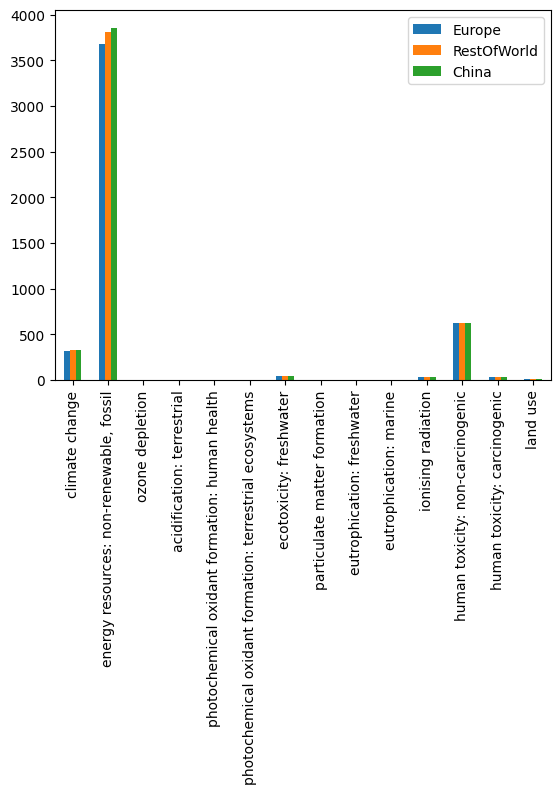

In [267]:
clean_result.plot.bar()

/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/

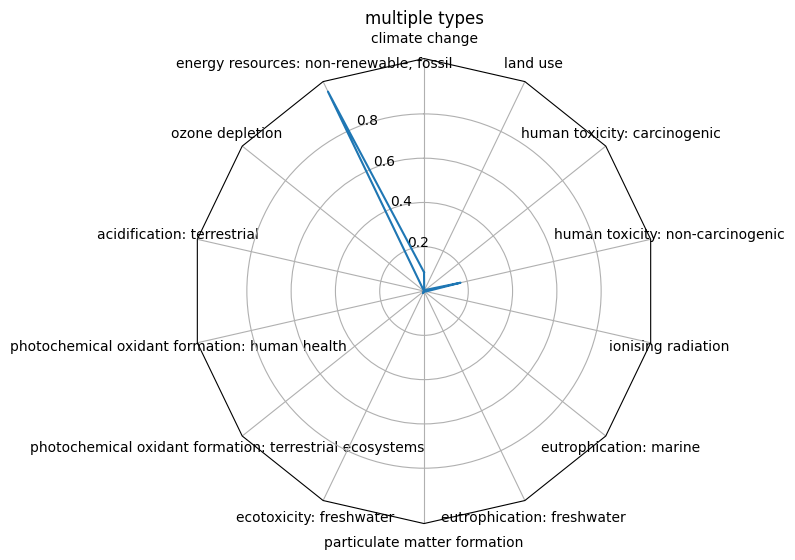

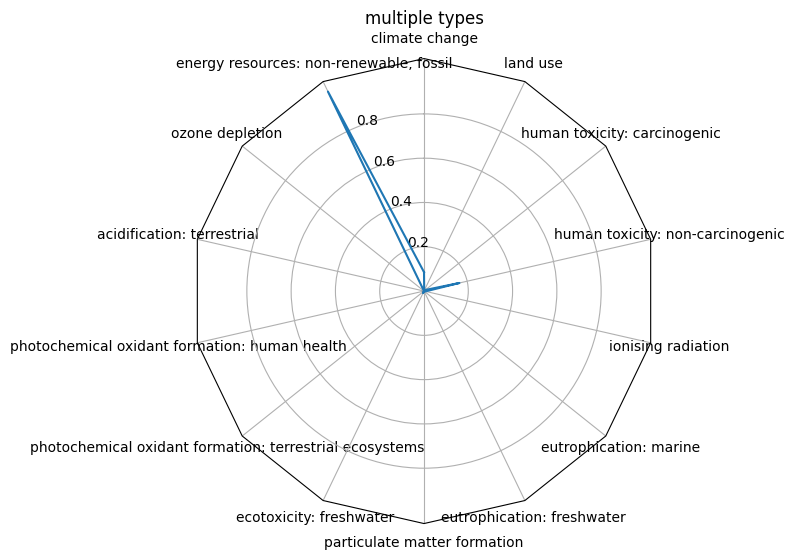

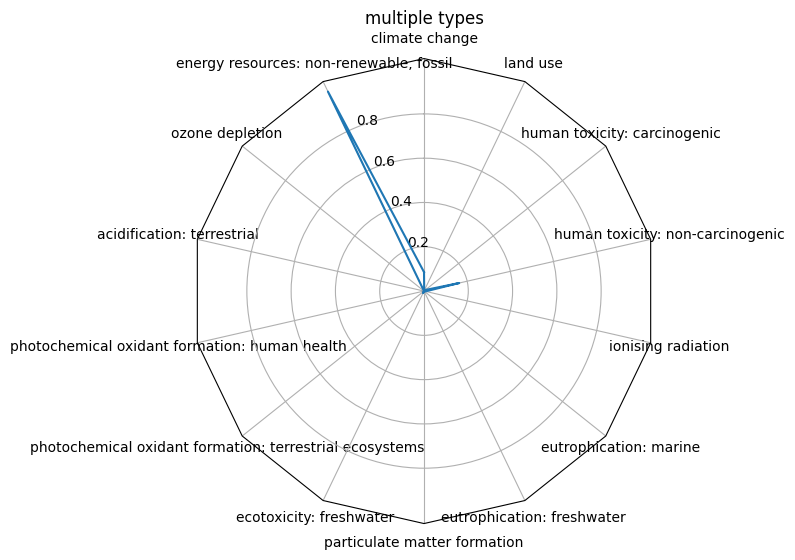

In [262]:


N = len(clean_result.index)
theta = plots.radar_factory(N, frame='polygon')
spoke_labels = clean_result.index
title = "multiple types"

for col in clean_result.columns:
    case_data = clean_result[col].values.T
    case_data = case_data.reshape(-1,1).T

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(top=0.85, bottom=0.05)

    ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
    ax.set_title(title,  position=(0.5, 1.1), ha='center')

    for d in case_data:
        line = ax.plot(theta, d)
        # ax.fill(theta, d,  alpha=0.25)
        
    ax.set_varlabels(spoke_labels)

plt.show()

### Pie

In [9]:
result = data.holistic_lca(data.module_type_selected, assmebly_input_dicts["Europe"])
result = pd.DataFrame(result).transpose()
overall_results = result[[c for c in result.columns if "non_numeric" not in c]]

    

/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/

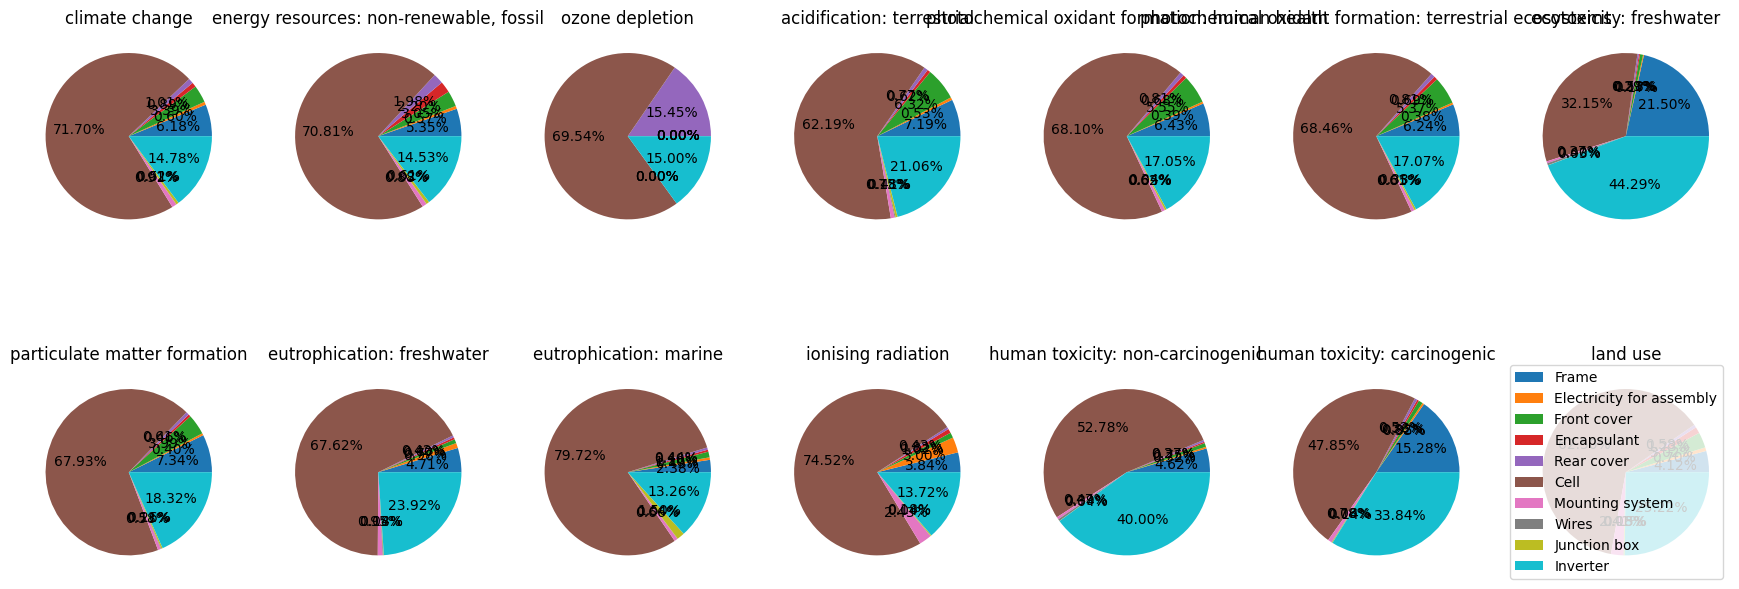

In [10]:
fig, ax = plt.subplots(figsize=(22,8), ncols=7, nrows=2)
ax = ax.flatten()
for n,indicator in enumerate(overall_results.index):
    impact_results = overall_results.loc[indicator]
    pie_results = 100*(impact_results / impact_results.sum())
    ax[n].pie(pie_results.values, autopct='%1.2f%%')
    ax[n].set_title(indicator)
    
plt.legend(pie_results.index, loc="right")

In [38]:
elements = [
    "Frame",
    "Assembly",
    "Front Cover",
    "Encapsulant",
    "Rear Cover",
    "Cell",
    "Mounting System",
    "Wires",
    "Junction Box",
    "Inverter",
]

colors = [
    "#1a9e77",
    "#d95f0d",
    "#a6761c",
    "#66a61d",
    "#e7298a",
    "#7570b3",
    "#666666",
    "#e6ab1f",
    "#0B15BE",
    "#000000",
]
color_dict = dict(zip(elements, colors))


pie_data = {}
for i in overall_results.index:
    js_data_format = []
    python_dict = overall_results.loc[i].to_dict()
    total_sum = sum(python_dict.values())
    for key, value in python_dict.items():
        # Convert key to title case and adjust specific names
        adjusted_key = (
            key.title()
            .replace("Electricity For Assembly", "Assembly")
            .replace("Front Cover", "Front Cover")
            .replace("Rear Cover", "Rear Cover")
            .replace("Mounting System", "Mounting System")
            .replace("Junction Box", "Junction Box")
        )
        # Calculate the proportional value
        proportional_value = (value / total_sum) * 100  # Assuming you want percentages
        js_data_format.append(
            {
                "name": adjusted_key,
                "value": round(proportional_value, 2),
                'color': color_dict[adjusted_key]
            }
        )

    pie_data[i] = js_data_format

with open(
    "/Users/jmccarty/GitHub/parametric-bipv-app/sample_figure/sample_pies.json", "w"
) as fp:
    json.dump(pie_data, fp)

In [39]:
pie_data

{'climate change': [{'name': 'Frame', 'value': 6.18, 'color': '#1a9e77'},
  {'name': 'Assembly', 'value': 0.6, 'color': '#d95f0d'},
  {'name': 'Front Cover', 'value': 3.39, 'color': '#a6761c'},
  {'name': 'Encapsulant', 'value': 0.89, 'color': '#66a61d'},
  {'name': 'Rear Cover', 'value': 1.01, 'color': '#e7298a'},
  {'name': 'Cell', 'value': 71.7, 'color': '#7570b3'},
  {'name': 'Mounting System', 'value': 0.91, 'color': '#666666'},
  {'name': 'Wires', 'value': 0.02, 'color': '#e6ab1f'},
  {'name': 'Junction Box', 'value': 0.51, 'color': '#0B15BE'},
  {'name': 'Inverter', 'value': 14.78, 'color': '#000000'}],
 'energy resources: non-renewable, fossil': [{'name': 'Frame',
   'value': 5.35,
   'color': '#1a9e77'},
  {'name': 'Assembly', 'value': 0.57, 'color': '#d95f0d'},
  {'name': 'Front Cover', 'value': 3.05, 'color': '#a6761c'},
  {'name': 'Encapsulant', 'value': 2.2, 'color': '#66a61d'},
  {'name': 'Rear Cover', 'value': 1.98, 'color': '#e7298a'},
  {'name': 'Cell', 'value': 70.81,

In [36]:
for i in pie_data['climate change']:
    print(i['name'])

Frame
Assembly
Front Cover
Encapsulant
Rear Cover
Cell
Mounting System
Wires
Junction Box
Inverter


In [34]:
import json

with open("/Users/jmccarty/GitHub/parametric-bipv-app/sample_figure/sample_curves.json","r") as fp:
    a = json.load(fp)
    
a.keys()

dict_keys(['0.05', '0.1', '0.15', '0.2', '0.25', '0.3', '0.35', '0.4', '0.45', '0.5', '0.55', '0.6', '0.65', '0.7', '0.75', '0.8', '0.85', '0.9', '0.95'])